In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import time

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
DATA_DIR = '/home/ruslan/datasets/bdd100k/seg/'
x_train_dir = os.path.join(DATA_DIR, 'images/train')
y_train_dir = os.path.join(DATA_DIR, 'labels/train')

x_valid_dir = os.path.join(DATA_DIR, 'images/val')
y_valid_dir = os.path.join(DATA_DIR, 'labels/val')

x_test_dir = os.path.join(DATA_DIR, 'images/test')

# all data paths
X_train_paths = np.sort([os.path.join(x_train_dir, image_name) for image_name in os.listdir(x_train_dir)])
y_train_paths = np.sort([os.path.join(y_train_dir, image_name) for image_name in os.listdir(y_train_dir)])

X_valid_paths = np.sort([os.path.join(x_valid_dir, image_name) for image_name in os.listdir(x_valid_dir)])
y_valid_paths = np.sort([os.path.join(y_valid_dir, image_name) for image_name in os.listdir(y_valid_dir)])

X_test_paths = np.sort([os.path.join(x_test_dir, image_name) for image_name in os.listdir(x_test_dir)])

In [3]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

In [4]:
from dataset import BDD100K
dataset_raw = BDD100K(X_train_paths,
                      y_train_paths,
                      classes=['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light',
                               'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car',
                               'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'void'])

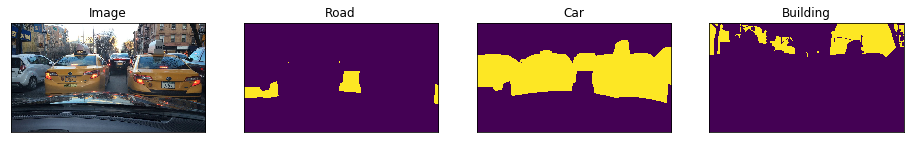

In [5]:
image, mask = dataset_raw[0] # get some sample

visualize(
    image=image, 
    road=mask[..., 0].squeeze(),
    car=mask[..., 13].squeeze(),
    building=mask[..., 2].squeeze(),
)

In [6]:
from segmodel import SegModel, model_selection_function

unet = model_selection_function('Unet')
unet.train(X_train_paths[:100], y_train_paths[:100], X_valid_paths[:100], y_valid_paths[:100], BDD100K, verbose=True)


Epoch: 0
valid: 100%|██████████| 100/100 [00:15<00:00,  6.57it/s, dice_loss - 0.9153, iou_score - 0.01739]
Model saved!
